In [12]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import IPython.display as ipd
from matplotlib import pyplot as plt

import torch

from ttsxai.utils.utils import read_ljs_metadata
from ttsxai.utils import plot_utils
from ttsxai.interfaces.tts_interface import TTSInterface, get_text2mel, get_mel2wave
from ttsxai.interfaces.prosody_interface import ProsodyInterface

In [29]:
from ttsxai.utils import jupyter_utils
jupyter_utils.register_always_reload(packages=[
    'ttsxai.interfaces',
#     # 'ttsxai.models.text2mel',
#     'ttsxai.models.mel2wave',
#     'ttsxai.utils',
])
jupyter_utils.register_always_reload(modules=[
    # 'ttsxai.text',
    # 'ttsxai.models.text2mel.tacotron2',
    # 'ttsxai.models.text2mel.fastspeech2',
    # 'ttsxai.utils.plot_utils',
    'ttsxai.pitch_calculator',
    # 'ttsxai.energy_calculator'
])

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = '/nas/users/dahye/kw/tts/ttsxai/data/LJSpeech/metadata.csv'
text_dict = read_ljs_metadata(mode='train')

text2mel = get_text2mel('tacotron2', device)
mel2wave = get_mel2wave('waveglow', device)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/nas/users/dahye/kw/tts/ttsxai/src/waveglow/glow.py:74: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2349.)
  W = torch.qr(torch.FloatTensor(c, c).normal_())[0]
/nas/users/dahye/kw/tts/ttsxai/src/tacotron2/stft.py:67: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)


In [38]:
tts = TTSInterface(
    device=device,
    text2mel=text2mel,
    mel2wave=mel2wave 
).to(device)

prosody = ProsodyInterface(tts.sampling_rate, tts.hop_length)


/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:163: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = pad_center(fft_window, filter_length)
/nas/users/dahye/kw/tts/ttsxai/src/ttsxai/energy_calculator.py:267: FutureWarning: Pass sr=22050, n_fft=1024, n_mels=80, fmin=0, fmax=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sampling_rate, filter_length, n_mel_channels, mel_fmin, mel_fmax


/nas/users/dahye/kw/tts/ttsxai/src/tacotron2/audio_processing.py:50: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  win_sq = librosa_util.pad_center(win_sq, n_fft)


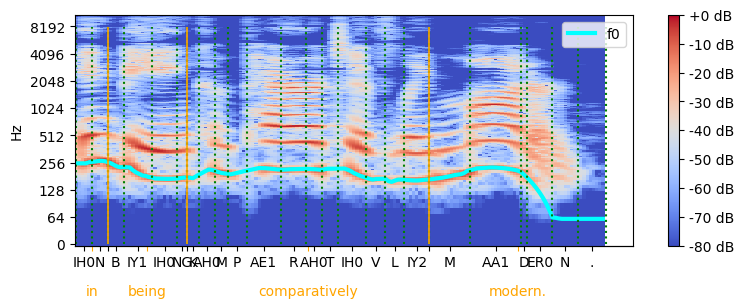

In [54]:
texts = list(text_dict.values())
# texts = texts[:4]

text = texts[1]

# for text in texts:
output_dict = tts.forward(text)
wave = output_dict['wave']
phonesymbols = output_dict['phonesymbols']
token = output_dict['token']
duration = output_dict['duration']
sampling_rate = tts.sampling_rate
hop_length = tts.hop_length

prosody_dict = prosody(wave)
pitch = prosody_dict['pitch']

fig, ax = plt.subplots(1, 1, figsize=(9, 3))
plot_utils.plot_spectrogram(wave, sr=sampling_rate, hop_length=hop_length, spec_type='spectrogram', ax=ax,
    f0=pitch)
plot_utils.plot_phonesymbols(text, phonesymbols, duration, hop_length, sampling_rate, ax)
plt.show()

ipd.Audio(wave, rate=tts.sampling_rate)
    # ax.set_xlim([0, len(wave) / sampling_rate])

In [18]:
ipd.Audio(wave, rate=tts.sampling_rate)

In [3]:
text_dict.tts = TTSInterface(
    device=device,
    text2mel=text2mel,
    mel2wave=mel2wave 
).to(device)

# text = text_dict['LJ023-0111']
# text = text_dict['LJ037-0224']
# text = 'My name is Kyowoon.'
text = 'in being comparatively modern.'
# text = 'Nor even when found guilty and his liberty forfeited did his privileges cease. The law appointed a suitable punishment for the offense;'
# text = 'Why don\'t we go out and get some nice sasimi?'
output_dict = tts.forward(text)
wave = output_dict['wave']

ipd.Audio(wave, rate=tts.sampling_rate)()

dict_keys(['LJ001-0001', 'LJ001-0002', 'LJ001-0003', 'LJ001-0004', 'LJ001-0005', 'LJ001-0006', 'LJ001-0007', 'LJ001-0008', 'LJ001-0009', 'LJ001-0010', 'LJ001-0011', 'LJ001-0012', 'LJ001-0013', 'LJ001-0014', 'LJ001-0016', 'LJ001-0017', 'LJ001-0018', 'LJ001-0019', 'LJ001-0020', 'LJ001-0021', 'LJ001-0022', 'LJ001-0023', 'LJ001-0024', 'LJ001-0025', 'LJ001-0026', 'LJ001-0027', 'LJ001-0028', 'LJ001-0029', 'LJ001-0030', 'LJ001-0031', 'LJ001-0032', 'LJ001-0033', 'LJ001-0034', 'LJ001-0035', 'LJ001-0036', 'LJ001-0037', 'LJ001-0038', 'LJ001-0039', 'LJ001-0040', 'LJ001-0041', 'LJ001-0042', 'LJ001-0043', 'LJ001-0044', 'LJ001-0045', 'LJ001-0046', 'LJ001-0047', 'LJ001-0048', 'LJ001-0049', 'LJ001-0050', 'LJ001-0052', 'LJ001-0053', 'LJ001-0054', 'LJ001-0055', 'LJ001-0056', 'LJ001-0057', 'LJ001-0058', 'LJ001-0059', 'LJ001-0060', 'LJ001-0061', 'LJ001-0062', 'LJ001-0064', 'LJ001-0065', 'LJ001-0066', 'LJ001-0067', 'LJ001-0068', 'LJ001-0069', 'LJ001-0070', 'LJ001-0071', 'LJ001-0073', 'LJ001-0074', 'LJ001-00

In [ ]:
tts = TTSInterface(
    device=device,
    text2mel=text2mel,
    mel2wave=mel2wave 
).to(device)

# text = text_dict['LJ023-0111']
# text = text_dict['LJ037-0224']
# text = 'My name is Kyowoon.'
text = 'in being comparatively modern.'
# text = 'Nor even when found guilty and his liberty forfeited did his privileges cease. The law appointed a suitable punishment for the offense;'
# text = 'Why don\'t we go out and get some nice sasimi?'
output_dict = tts.forward(text)
wave = output_dict['wave']

ipd.Audio(wave, rate=tts.sampling_rate)